In [14]:
# Base modules

from numpy import load
import numpy as np
from pathlib import Path

# Import os & glob
import os
import glob

# Import plot tools
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from mpl_toolkits import mplot3d

# Import data analysis tools
from scipy.signal import savgol_filter
from scipy import interpolate
import pandas as pd
from scipy.signal import find_peaks

import seaborn as sns
import matplotlib.gridspec as grid_spec

from statsmodels.graphics import tsaplots
import random

# Import timing
import time
import natsort
import itertools

from sklearn.utils import shuffle

import plotly.express as px
from tqdm.notebook import tqdm

%matplotlib widget

In [2]:
desired_cols = ['fishz', 'fishy', 'fishx','start_time', 'uuid', 'realtime']
df = pd.read_csv("C:/PhD/17042023/long-term-free-swim/01_T1_1b8cd8200e6211edb285003053fc6914_VR03.csv.gz", usecols=desired_cols)

In [15]:
zs = savgol_filter(df.fishz, 11, 1)#df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
ys = savgol_filter(df.fishy, 11, 1)#df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
xs = savgol_filter(df.fishx, 11, 1)#df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
dx= np.diff(xs)#xs.diff().interpolate(method='bfill')
dy= np.diff(ys)#ys.diff().interpolate(method='bfill')
dz= np.diff(zs)#zs.diff().interpolate(method='bfill')

# df["dx"] = dx
# df["dy"] = dy
# df["dz"] = dz

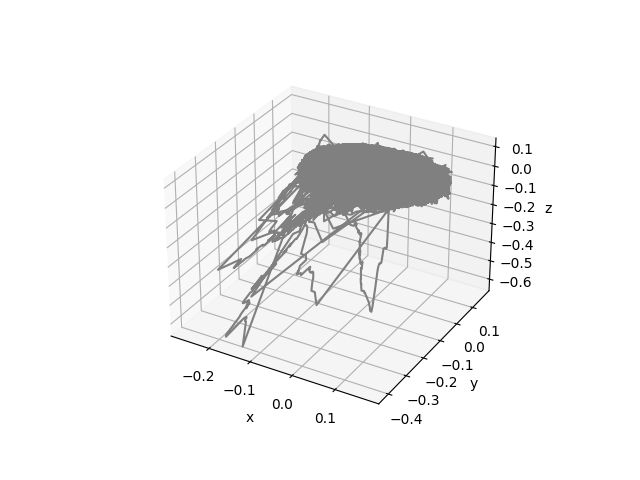

In [16]:
#make 3d plot of fish position using fishx, fishy, fishz
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df['fishx'], df['fishy'], df['fishz'], 'gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


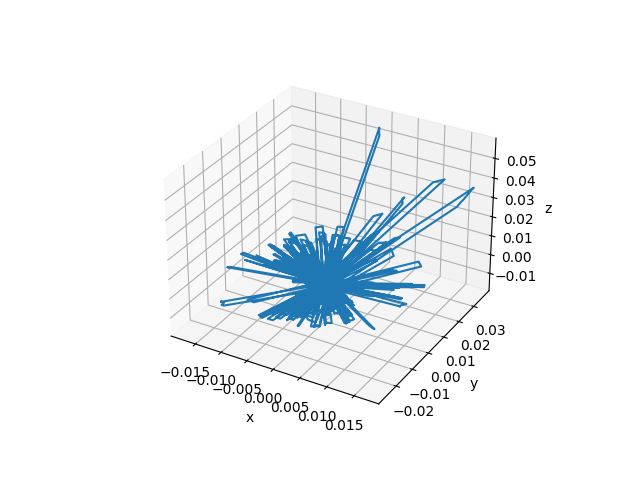

In [17]:
#make 3d plot of fish position using fishx, fishy, fishz
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


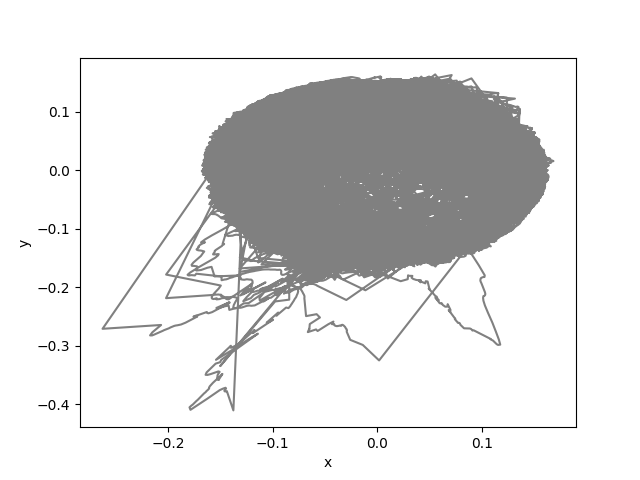

In [18]:
#plot fish position using fishx, fishy
fig = plt.figure()
ax = plt.axes()
ax.plot(df['fishx'], df['fishy'], 'gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

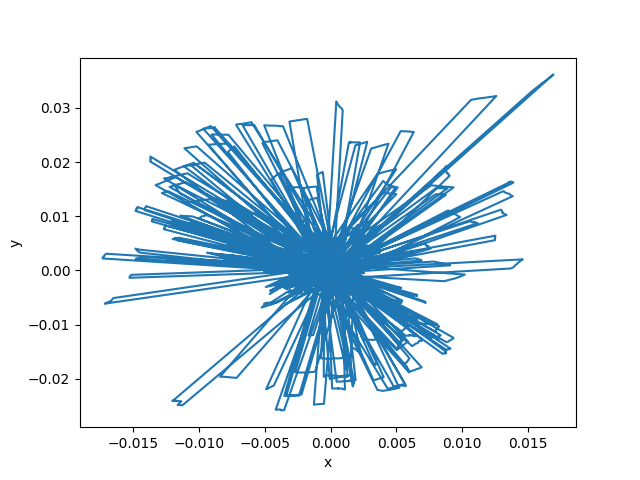

In [19]:
#plot fish position using fishx, fishy
fig = plt.figure()
ax = plt.axes()
ax.plot(dx, dy)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [20]:
angle = np.arctan2(dy, dx)

angle_temp = np.arctan2(df["fishy"], df["fishx"])

In [21]:
exp_time = df['realtime']- df['realtime'][0]
exp_time = exp_time/60
exp_time

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
502249    90.859000
502250    90.859167
502251    90.859333
502252    90.859500
502253    90.859500
Name: realtime, Length: 502254, dtype: float64

ValueError: array length 502253 does not match index length 502254

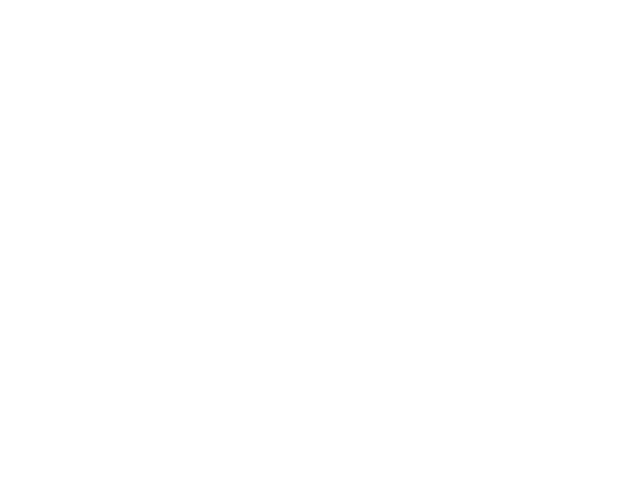

In [24]:
figure2 = plt.figure()
# plot angle and time using sns
sns.lineplot(x=exp_time, y=angle, color='black')
sns.lineplot(x=exp_time, y=angle_temp, color='red')
plt.xlabel('Time (min)')
plt.ylabel('Angle (rad)')
plt.show()


In [ ]:
#  plot histogram of angle
figure3 = plt.figure()
sns.histplot(df['angle'], kde=True)
sns.histplot(angle_temp, kde=True)
#add legend
plt.legend({'angle': df['angle'].mean(), 'angle_temp': angle_temp.mean()})
plt.show()

In [ ]:
speed_temp = np.sqrt(df['fishx']**2 + df['fishy']**2 + df['fishz']**2)

In [ ]:

# calculate speed
fHz= 100 #fps
dt = 1/fHz

speed = np.sqrt(df['dx']**2 + df['dy']**2 + df['dz']**2)/dt
df['speed'] = speed

figure4 = plt.figure()
# plot speed and time using sns
sns.lineplot(x=df['exp_time'], y=df['speed'], data=df)
sns.lineplot(x=df['exp_time'], y=speed_temp, data=df, color='red')
# add legend
plt.legend({'speed': df['speed'].mean(), 'speed_temp': speed_temp.mean()})
plt.show()

In [ ]:
# unwrap angle from -180 to 180
ang_temp_int = []
tmpx = 0

for ii in range(int(1*(len(angle_temp)-1))):
    tmpx += angle_temp[ii]
    ang_temp_int.append(tmpx)

angle_temp_unwrap = np.array(ang_temp_int)

In [ ]:
# unwrap angle from -180 to 180
ang_int = []
tmp = 0

for ii in range(int(1*(len(angle)-1))):
    tmp += angle[ii]
    ang_int.append(tmp)
    
angle_unwrap = np.array(ang_int)

In [ ]:
# plot angle_temp_unwrap using matplotlib
figure5 = plt.figure()
plt.plot(angle_temp_unwrap, color='red')
plt.plot(angle_unwrap)
plt.show()



In [ ]:
frames_btw_2bouts = round(fHz/5)
bout_width = round(fHz/100)

h = [0.02,0.3]

# gets the indices at which if finds peaks
peaks,_ = find_peaks(speed, height = h, distance = frames_btw_2bouts, prominence = 0.05)

# get the values of phi only at burst events (discretization)
angle_burst = angle[peaks]
dangle = np.diff(angle_burst)
dangle_centered = ((dangle + 2*np.pi)% 2*np.pi)- np.pi

#  get the time of the burst events
time_burst = df.exp_time[peaks]

In [ ]:
# gets the indices at which if finds peaks
peaks_temp,_ = find_peaks(speed_temp, height = h, distance = frames_btw_2bouts, prominence = 0.05)

# get the values of phi only at burst events (discretization)
angle_burst_temp = angle_temp[peaks_temp]
dangle_temp = np.diff(angle_burst_temp)
dangle_centered_temp = ((dangle_temp + 2*np.pi)% 2*np.pi)- np.pi

#  get the time of the burst events
time_burst_temp = df.exp_time[peaks_temp]

In [ ]:
# plot peaks
figure6 = plt.figure()
# plt.plot(speed)
plt.plot(peaks, speed[peaks], "x")
# plt.plot(speed_temp)
plt.plot(peaks_temp, speed_temp[peaks_temp], "x")
plt.show()


In [ ]:
dangle

In [ ]:
direction = np.where(dangle > 0, 'left', 'right')
unique, counts = np.unique(direction, return_counts=True)
bias_ = dict(zip(unique, counts))
right_bias = bias_['right'] / len(direction)
left_bias = bias_['left'] / len(direction)
print('Right bias:', right_bias)
print('Left bias:', left_bias)

In [ ]:
direction_temp = np.where(dangle_temp> 0, 'left', 'right')
unique_temp, counts_temp = np.unique(direction_temp, return_counts=True)
bias_temp = dict(zip(unique_temp, counts_temp))
right_bias_temp = bias_temp['right'] / len(direction_temp)
left_bias_temp = bias_temp['left'] / len(direction_temp)
print('Right bias:', right_bias_temp)
print('Left bias:', left_bias_temp)

In [ ]:
turn_directions = direction
turn_directions_temp = direction_temp

In [ ]:
def calculate_turn_streak(turn_directions):
    streak = 0
    for direction in reversed(turn_directions):
        if direction == "right" and streak % 2 == 0:
            streak += 1
        elif direction == "left" and streak % 2 == 1:
            streak += 1
        else:
            break
    return streak

print ('Streak:', calculate_turn_streak(turn_directions))

In [ ]:
#get sign of dangle_centered
sign_dangle = np.sign(dangle_centered)
sign_dangle_temp = np.sign(dangle_centered_temp)
print("sign_dangle:", sign_dangle)
print("sign_dangle_temp:", sign_dangle_temp)

In [ ]:
#get streak length
streak_length = []
streak_length_temp = []
streak = 0
streak_temp = 0
for ii in range(len(sign_dangle)):
    if sign_dangle[ii] == 1:
        streak += 1
    else:
        streak_length.append(streak)
        streak = 0
streak_length.append(streak)

for ii in range(len(sign_dangle_temp)):
    if sign_dangle_temp[ii] == 1:
        streak_temp += 1
    else:
        streak_length_temp.append(streak_temp)
        streak_temp = 0
streak_length_temp.append(streak_temp)

print("streak_length:", streak_length)
print("streak_length_temp:", streak_length_temp)

In [ ]:
#plot histogram of streak length using matplotlib
figure7 = plt.figure()
plt.hist(streak_length, bins=10)
plt.hist(streak_length_temp, bins=10)
plt.show()